# # Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

### Importing neccessary Libraries

In [18]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Load the dataset

In [19]:
df= pd.read_csv(r"C:\Users\kingzuzu\Desktop\Prodigy Ml\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


###  Checking for Data type

In [20]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Checking for Null Values 

In [21]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Select relevant features for clustering

In [22]:
X = df.iloc[:, [3, 4]].values 

### Finding the optimal number of clusters using the Elbow Method

In [23]:
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Plot the Elbow Method graph

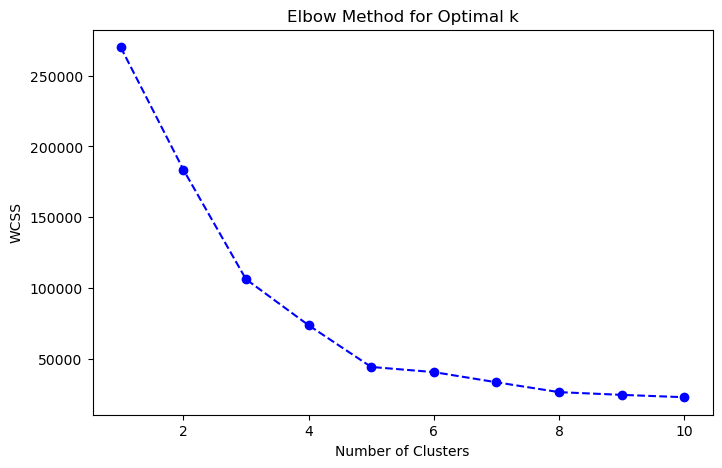

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


### Apply K-means clustering with the optimal number of clusters (k=5)

In [31]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

### Visualizing the clusters

In [32]:
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

<Figure size 800x600 with 0 Axes>

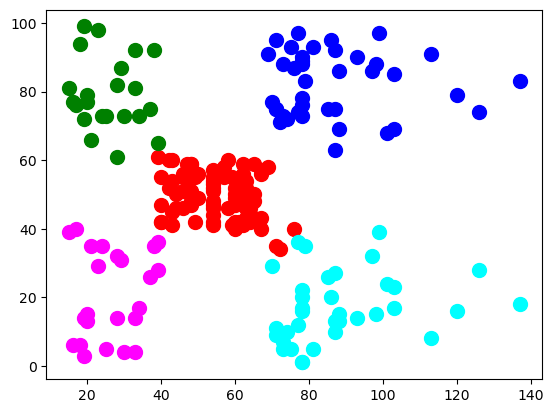

In [27]:
for i in range(5):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')

### Plotting the cluster centers

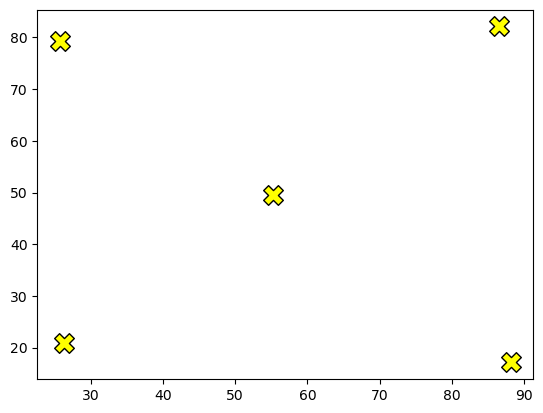

In [28]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', edgecolors='black', marker='X', label='Centroids')

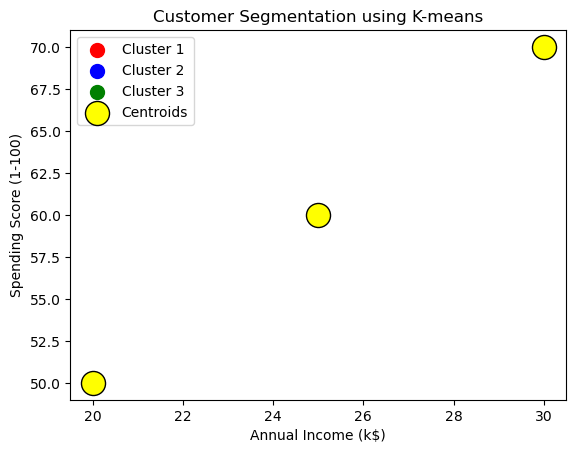

In [29]:


# Example clustered data (Replace with your actual data)
X = [[15, 39], [16, 81], [17, 6], [18, 77], [19, 40]]  # Dummy data
X = np.array(X)  # Convert to numpy array if needed
y_kmeans = [0, 1, 0, 1, 2]  # Example cluster labels

# Scatter plot with labels
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# If centroids exist, plot them
kmeans_centers = np.array([[20, 50], [25, 60], [30, 70]])  # Dummy centroids
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=300, c='yellow', label='Centroids', edgecolors='black')

# Labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-means')

# Display the legend
plt.legend()
plt.show()
